import numpy as np
import matplotlib.pyplot as plt

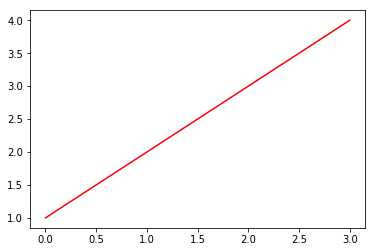

In [4]:
x = np.linspace(0,3,4)  # xの値域(0, 1, 2, 3)
y = x + 1               # 直線の式
plt.plot(x,y,"r-")      # 直線を引く
plt.show()   

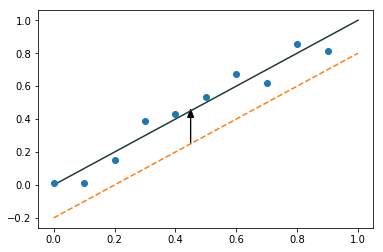

In [67]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1)  # xの値域(0, 1, 2, 3)
y = x               # 直線の式
plt.plot(x,y,"#23373b")      # 直線を引く
z = (np.random.rand(1,10)[0] - 0.5) * 0.2
plt.plot(np.arange(0,1,0.1), z+np.arange(0,1,0.1), 'o')
w = x - 0.2
plt.plot(x, w, "--")
ax = plt.axes()
ax.arrow(0.45, 0.25, 0, 0.16, head_width=0.02, head_length=0.05, fc='k', ec='k')
plt.savefig('arrange_params.eps')
plt.show()   


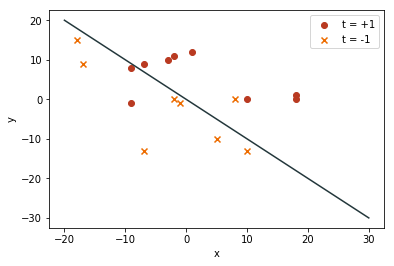

In [104]:
plt.scatter([-9, -9,-7,-3,-2, 1,10,18,18],[-1,8,9, 10, 11, 12,0,1,0], marker='o', label='t = +1', c='#B93A21')
plt.scatter([-18, -17,-7,-2,-1, 8,10,5],[15,9,-13, 0, -1, 0,-13,-10], marker='x', label='t = -1', c='#ED6C00')
x = np.linspace(-20,30,10)
# F9E72C
# 6DB9AA
y = -x

plt.plot(x,y, '#23373b')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig('scatter.eps')
plt.show()

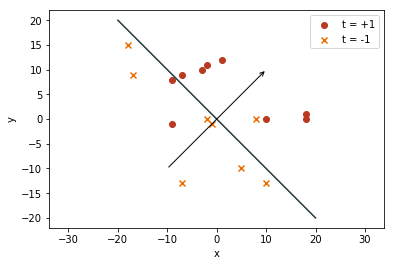

In [125]:
plt.scatter([-9, -9,-7,-3,-2, 1,10,18,18],[-1,8,9, 10, 11, 12,0,1,0], marker='o', label='t = +1', c='#B93A21')
plt.scatter([-18, -17,-7,-2,-1, 8,10,5],[15,9,-13, 0, -1, 0,-13,-10], marker='x', label='t = -1', c='#ED6C00')
x = np.linspace(-20,20,10)
# F9E72C
# 6DB9AA
y = -x


plt.plot(x,y, '#23373b')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal')
ax = plt.subplot(1,1,1)

ax.annotate("",
            xy=(10, 10), xycoords='data',
            xytext=(-10, -10), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), 
            )

plt.savefig('direction.eps')
plt.show()

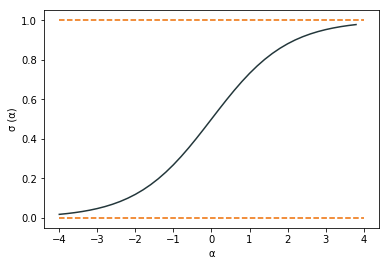

In [139]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np
plt.hlines(y=[1,0.], xmin=-4, xmax=4, colors='#ED6C00', linestyles='dashed')
x = np.arange(-4, 4., 0.2)
sig = sigmoid(x)
plt.xlabel("α")
plt.ylabel('σ (α)')
plt.plot(x,sig, c = '#23373b')
plt.savefig('sigmoid.eps')
plt.show()
